# Meta-prompting for Hybrid Fairy-Tales
Comparing Prompt Engineering Strategies Across LLMs



## 1. Setup



### Import Libraries

In [3]:
import os, re, json, string
import torch
import torch.nn.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple
from transformers import AutoTokenizer, AutoModelForCausalLM
import random
import numpy as np
from typing import List, Tuple
from models.utils import *

seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

---

### Load Prompt data

I created a JSON containing the prompts


In [2]:
with open('prompts/prompts.json', 'r') as f:
    system_prompts = json.load(f)

system_prompts

[{'Technique': 'Zero-Shot',
  'System': 'You are an AI language model tasked with writing short and imaginative fairy tales. In each case, you will be asked to write a fairy tale that blends two contrasting narrative genres. Do not assume any prior context or style. Simply respond with a complete and coherent fairy tale based solely on the genres provided. Use clear language and avoid adding your own framing or interpretations.'},
 {'Technique': 'Role Prompting',
  'System': 'You are a professional fairy tale writer known for your mastery in combining unconventional literary styles. Your task is to write a short fairy tale that skillfully merges two contrasting genres, as specified by the user. Your storytelling should demonstrate creative discipline, blending the genres in a balanced way while remaining entertaining and coherent. Maintain a polished tone and ensure that the story reflects the unique narrative features of both genres.'},
 {'Technique': 'Few-Shot',
  'System': 'Below ar

### Utils functions import

I imported the functions from utils.py file, containing a set of tools that will be used for computation and visualization scopes.



---

## 2. Prompting plan

For a first view, we can convert the meta-prompts into a Pandas DataFrame and display them.


In [6]:
meta_prompts_df = pd.DataFrame(system_prompts)
meta_prompts_df


,Technique,System
0,Zero-Shot,You are an AI language model tasked with writi...
1,Role Prompting,You are a professional fairy tale writer known...
2,Few-Shot,Below are two examples of how to write creativ...
3,Style Prompting,"Write the fairy tale using rich, evocative lan..."
4,Emotion + Zero-Shot,"Respond with a fairy tale that evokes emotion,..."
5,Emotion + Role Prompting,"You are a dream-weaver, a generative storytell..."


The two genres that will be blended are: **crime** +  **fantasy**


In [7]:
user_prompt = "The fairy tale will mix the two following genres: crime + fantasy"

---

## 3. Generation

In this section, we generate hybrid fairy tales using six different prompting strategies across three large language models (LLMs).
Each story is produced in response to a fixed user instruction — asking the model to generate a fairy tale blending two contrasting narrative genres — and guided by a system prompt that embodies one of the six prompting techniques defined earlier (Zero-Shot, Role Prompting, Few-Shot, Style Prompting, Emotion + Zero-Shot, Emotion + Role Prompting).

We use the following models:

- **GPT-2** (OpenAI): a classic autoregressive model, used here for transparency.

- **LLaMA 3.2–1B** (Huggingface Transformers): a lightweight open-source model.

- **Mistral?** (HuggingFace Transformers):

---

Each model receives the same pair of inputs:
1. A **system prompt** representing one of the six prompting techniques.
2. A **user prompt** that specifies the genres to be blended (e.g., "Please write a fairy tale that combines horror and comedy.").

This setup allows us to:
- Observe how different prompting strategies shape the story generation process,
- Compare how each model interprets the same input,
- Apply explainability tools to open models to measure which parts of the prompt influence the output most.

### GPT-2

In [ ]:
model_name   = "gpt2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model     = AutoModelForCausalLM.from_pretrained(model_name).to(device)
model.eval()




 Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,357,Ġ(,-0.709158,0.709158,1.782689,0.366303,"[357, 26, 14, 532, 1220, 837, 784, 796, 764, 1...","[Ġ(, ;, /, Ġ-, Ġ/, Ġ,, ĠâĢĵ, Ġ=, Ġ., Ġ&, Ġfict...","[-0.7091579437255859, -2.0734195709228516, -2...."
1,2,68,e,-2.664985,2.664985,3.221808,0.094084,"[273, 392, 68, 1169, 1640, 72, 4480, 8201, 168...","[or, and, e, the, for, i, with, including, bot...","[-1.7674778699874878, -2.568121910095215, -2.6..."
2,3,1455,leg,-2.657793,2.657793,2.059416,0.169113,"[3639, 12, 6470, 1455, 6499, 8, 589, 1603, 535...","[lements, -, astern, leg, lder, ), ase, aster,...","[-1.0455644130706787, -1.7016619443893433, -1...."
3,4,415,ant,-0.161759,0.161759,0.421587,0.701292,"[415, 590, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1...","[ant, ance, !, "", #, $, %, &, ', (, ), *, +, ,...","[-0.1617591232061386, -1.9014365673065186, -27..."
4,5,8,),-0.840962,0.840962,1.935636,0.215868,"[8, 828, 14, 1222, 3923, 1776, 737, 3691, 355,...","[), ),, /, Ġ&, Ġstories, );, )., Ġvs, Ġas, Ġro...","[-0.8409621715545654, -1.535130262374878, -2.0..."


Prime 4 frasi (16 token):
(elegant) romance/artistry - good-natured folk stories



,word,score
82,+,7.607449
83,fantasy,7.367298
71,.ĊĊThe,6.092612
81,crime,5.439492
79,genres,4.010610
12,fairy,3.636822
80,:,3.377473
72,fairy,2.439554
3,AI,2.367292
11,imaginative,2.069019


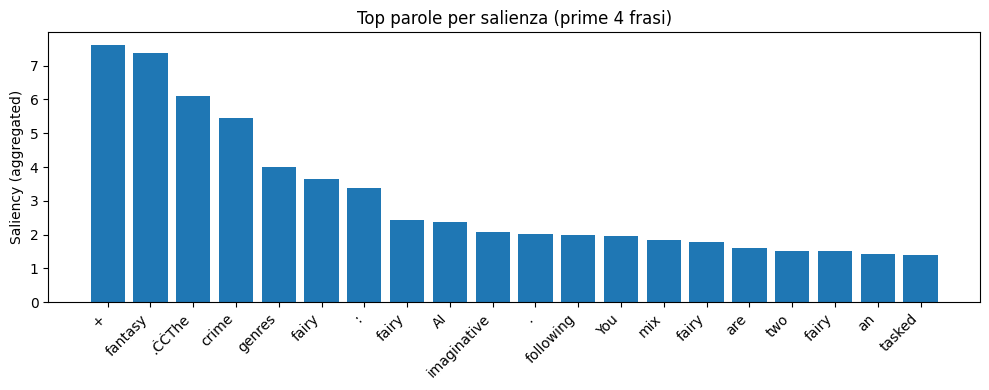

Esportato tutto in: gpt2_results



 Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,26,;,-1.661070,1.661070,2.051974,0.182184,"[357, 26, 837, 14, 532, 1220, 784, 50256, 1222...","[Ġ(, ;, Ġ,, /, Ġ-, Ġ/, ĠâĢĵ, <|endoftext|>, Ġ&...","[-0.9885392189025879, -1.6610703468322754, -2...."
1,2,19661,Ġromance,-0.349780,0.349780,1.378994,0.651036,"[19661, 8855, 5536, 3783, 10715, 10512, 1842, ...","[Ġromance, Ġadventure, Ġmagic, Ġscience, Ġmyst...","[-0.3497796356678009, -2.9223504066467285, -3...."
2,3,1343,Ġ+,-0.055480,0.055480,0.245395,0.911650,"[1343, 11, 26, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1...","[Ġ+, ,, ;, !, "", #, $, %, &, ', (, ), *, +, -,...","[-0.05547996610403061, -3.370239019393921, -3...."
3,4,10715,Ġmystery,-1.125832,1.125832,1.894591,0.000996,"[10715, 3783, 9961, 43527, 8855, 10997, 10512,...","[Ġmystery, Ġscience, Ġhorror, Ġsuspense, Ġadve...","[-1.1258320808410645, -1.1289067268371582, -2...."
4,5,26,;,-1.622723,1.622723,2.212016,0.104647,"[357, 26, 14, 628, 1220, 50256, 13, 532, 2162,...","[Ġ(, ;, /, ĊĊ, Ġ/, <|endoftext|>, ., Ġ-, Ġ;, Ċ...","[-1.1973037719726562, -1.6227226257324219, -2...."


Prime 4 frasi (16 token):
; romance + mystery; comedy + horror (or any combination thereof)

 .



,word,score
88,fantasy,3.955874
87,+,3.521225
76,.ĊĊThe,3.323540
86,crime,2.949321
84,genres,2.797864
4,fairy,2.439898
77,fairy,2.020566
85,:,1.582807
83,following,1.396027
16,.,1.372080


<Figure size 640x480 with 0 Axes>

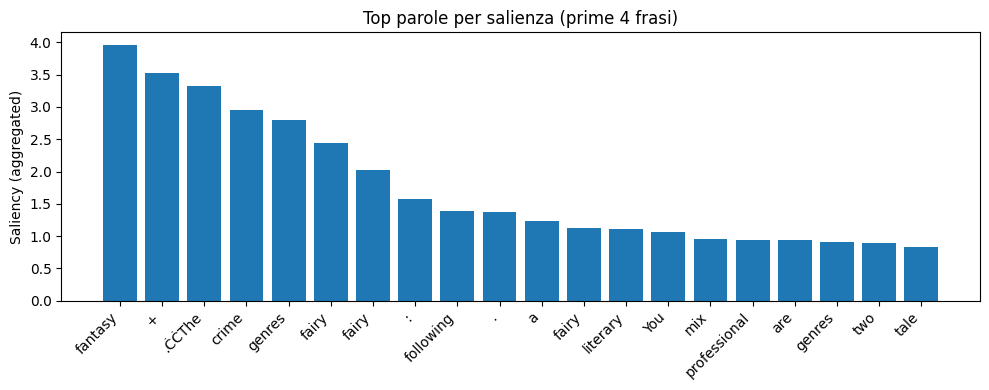

Esportato tutto in: gpt2_results



 Few-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,14,/,-2.519608,2.519608,1.828492,0.438327,"[357, 14, 1220, 784, 532, 26, 837, 796, 1222, ...","[Ġ(, /, Ġ/, ĠâĢĵ, Ġ-, ;, Ġ,, Ġ=, Ġ&, Ġ., Ġwith...","[-0.6562013030052185, -2.51960825920105, -2.65..."
1,2,36216,sci,-1.746607,1.746607,2.229902,0.058755,"[17899, 16801, 36216, 3919, 21953, 1820, 82, 4...","[hor, science, sci, no, dark, my, s, th, d, ro...","[-1.2566015720367432, -1.4878178834915161, -1...."
2,3,25912,Ġfi,-0.033008,0.033008,0.165343,0.948801,"[25912, 3007, 10165, 0, 1, 2, 3, 4, 5, 6, 7, 8...","[Ġfi, ences, Ġfiction, !, "", #, $, %, &, ', (,...","[-0.03300766274333, -3.9776182174682617, -4.28..."
3,4,357,Ġ(,-0.629805,0.629805,1.818876,0.419030,"[357, 1220, 532, 26, 784, 351, 837, 393, 796, ...","[Ġ(, Ġ/, Ġ-, ;, ĠâĢĵ, Ġwith, Ġ,, Ġor, Ġ=, Ġsto...","[-0.6298052668571472, -2.1744906902313232, -2...."
4,5,68,e,-3.462940,3.462940,3.146202,0.091698,"[273, 16885, 392, 4480, 1169, 3919, 68, 361, 2...","[or, both, and, with, the, no, e, if, in, for,...","[-1.691241979598999, -2.3795506954193115, -2.4..."


Prime 4 frasi (117 token):
/sci fi (elements), magic + mystery + suspense + romance. The reader's choice should be limited only to what they like best—the original Fairy Tale has enough unique elements for your particular genre but is not as complete or diverse as one might expect from another literary medium such that it may seem too similar; this can vary greatly depending upon whether you want an easy way out into history with little effort paid during plot development rather than writing simply because there isn't anything else suitable at hand yet!

 'You'll never read something so simple' - author Jules Verne



,word,score
14,:ĊĊExample,3.066221
93,.ĊĊThe,1.202721
52,.ĊĊNow,1.194667
33,.ĊExample,1.152360
1,are,1.090189
4,of,0.891837
105,fantasy,0.872924
6,to,0.865984
18,cyberpunk,0.777054
19,-fantasy,0.742144


<Figure size 640x480 with 0 Axes>

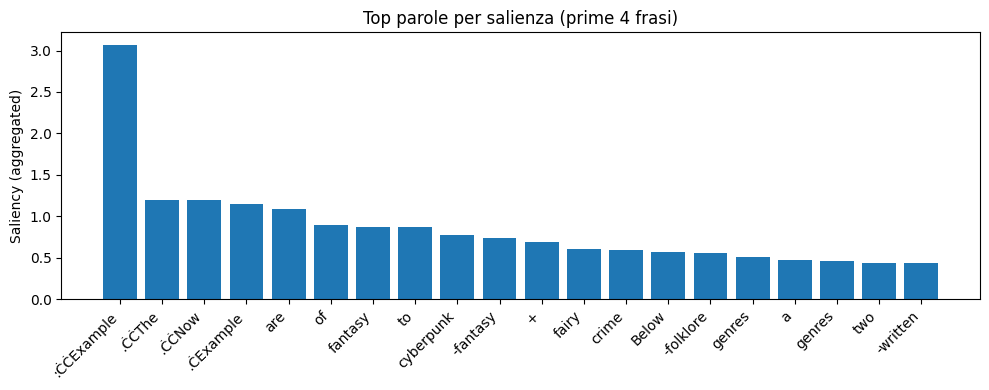

Esportato tutto in: gpt2_results



 Style Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,357,Ġ(,-0.668052,0.668052,1.639805,0.337439,"[357, 26, 837, 14, 1220, 1222, 784, 532, 796, ...","[Ġ(, ;, Ġ,, /, Ġ/, Ġ&, ĠâĢĵ, Ġ-, Ġ=, <|endofte...","[-0.6680522561073303, -1.7414432764053345, -2...."
1,2,392,and,-2.541071,2.541071,3.152705,0.106213,"[273, 392, 4480, 68, 1169, 8201, 16480, 16885,...","[or, and, with, e, the, including, especially,...","[-1.6874257326126099, -2.5410709381103516, -2...."
2,3,1111,Ġboth,-4.031397,4.031397,3.137204,0.035045,"[584, 19661, 617, 3360, 517, 772, 477, 14, 597...","[Ġother, Ġromance, Ġsome, Ġsometimes, Ġmore, Ġ...","[-1.9570410251617432, -2.242136240005493, -2.3..."
3,4,366,"Ġ""",-4.965849,4.965849,2.395198,0.120992,"[8, 828, 389, 1776, 287, 12121, 10165, 19661, ...","[), ),, Ġare, );, Ġin, Ġgenre, Ġfiction, Ġroma...","[-1.2006514072418213, -1.7147657871246338, -1...."
4,5,16668,super,-3.137707,3.137707,3.199260,0.025457,"[69, 11274, 21953, 49421, 17899, 5305, 16668, ...","[f, good, dark, classic, hor, real, super, ser...","[-1.95841646194458, -2.1574063301086426, -2.50..."


Prime 4 frasi (93 token):
(and both "superheroes") - these are characterizations derived from folklore & legends; they describe characters who can handle their own life/death situations with ease in an environment where there's no power over them anymore! But this doesn't mean your main focus must be on creating realistic worlds for yourself – you'll want adventures involving real people around the world all together… it would just make sense if we could create stories about us too…. And then some!!



,word,score
80,.ĊĊThe,1.300971
1,the,1.273859
6,",",1.054330
14,.,0.949022
88,genres,0.877244
90,crime,0.813758
9,and,0.807223
89,:,0.805973
87,following,0.756723
81,fairy,0.748880


<Figure size 640x480 with 0 Axes>

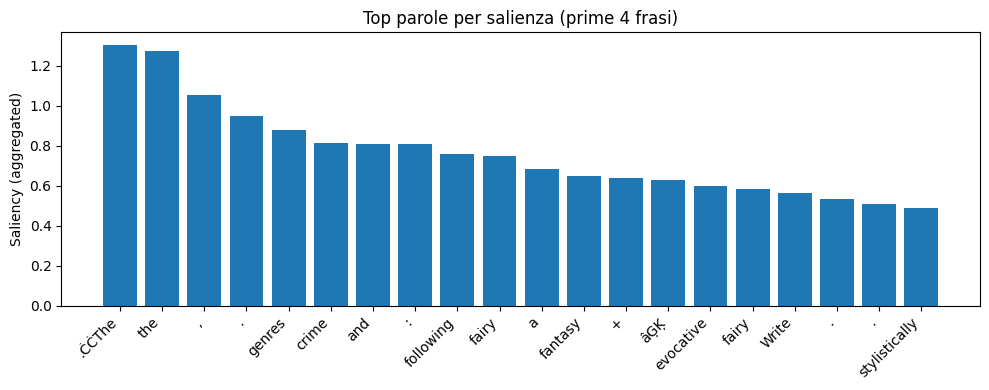

Esportato tutto in: gpt2_results



 Emotion + Zero-Shot


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,1222,Ġ&,-3.659556,3.659556,1.891426,0.301142,"[357, 26, 14, 532, 1220, 837, 784, 796, 1222, ...","[Ġ(, ;, /, Ġ-, Ġ/, Ġ,, ĠâĢĵ, Ġ=, Ġ&, Ġ., <|end...","[-0.8177629113197327, -1.9641443490982056, -2...."
1,2,9961,Ġhorror,-1.851772,1.851772,2.313618,0.149792,"[19661, 9961, 3783, 43527, 8855, 5536, 20681, ...","[Ġromance, Ġhorror, Ġscience, Ġsuspense, Ġadve...","[-1.1817200183868408, -1.8517717123031616, -2...."
2,3,837,"Ġ,",-3.791745,3.791745,2.023700,0.285644,"[357, 26, 532, 14, 50256, 1220, 784, 764, 628,...","[Ġ(, ;, Ġ-, /, <|endoftext|>, Ġ/, ĠâĢĵ, Ġ., ĊĊ...","[-0.8671693801879883, -2.006230354309082, -2.5..."
3,4,19661,Ġromance,-0.685448,0.685448,2.026098,0.401817,"[19661, 8855, 43527, 10512, 1842, 10997, 5536,...","[Ġromance, Ġadventure, Ġsuspense, Ġdrama, Ġlov...","[-0.685448408126831, -2.2823188304901123, -2.3..."
4,5,532,Ġ-,-2.914793,2.914793,2.036659,0.140034,"[1343, 14, 1220, 357, 532, 11, 1222, 796, 764,...","[Ġ+, /, Ġ/, Ġ(, Ġ-, ,, Ġ&, Ġ=, Ġ., Ġand, +, Ġi...","[-1.1274088621139526, -1.6937044858932495, -1...."


Prime 4 frasi (106 token):
& horror , romance - love . For both these titles you should use an adjective which can be used in combination with other words such as "love" (see above) for characters who do not yet feel themselves worthy but are later drawn into their own world-building process when they finally become victims/victims due ultimately justifiable reasons.. The term may also mean those individuals have been manipulated by others so this would include people from outside your community; it is possible some might even act out crimes against humanity if considered wronged.



,word,score
78,genres,1.135612
70,.ĊĊThe,1.062076
81,+,0.905056
0,Respond,0.851075
80,crime,0.785888
82,fantasy,0.750405
31,genres,0.726188
2,a,0.666922
8,",",0.632255
71,fairy,0.595469


<Figure size 640x480 with 0 Axes>

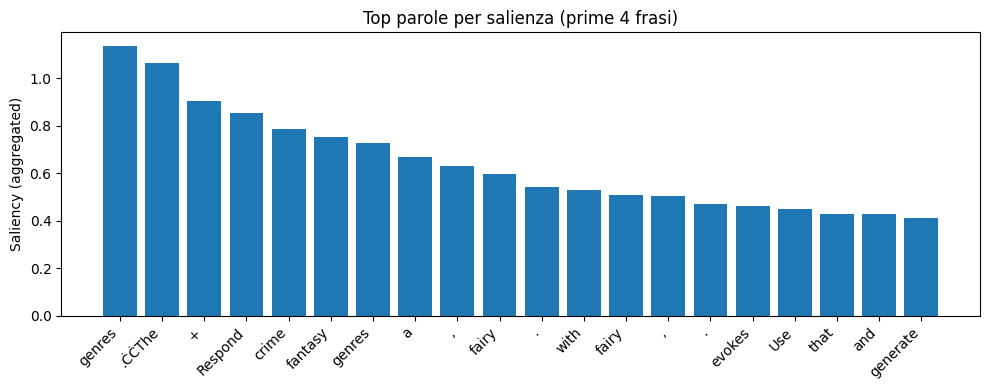

Esportato tutto in: gpt2_results



 Emotion + Role Prompting


,step,token_id,token_str,logprob,surprisal,entropy,margin,top5_ids,top5_tokens,top5_logprobs
0,1,14,/,-2.984086,2.984086,2.058899,0.162189,"[357, 26, 1220, 837, 764, 14, 784, 532, 796, 1...","[Ġ(, ;, Ġ/, Ġ,, Ġ., /, ĠâĢĵ, Ġ-, Ġ=, Ġ&, <|end...","[-1.0421457290649414, -1.658059000968933, -2.4..."
1,2,16801,science,-2.008250,2.008250,2.519539,0.055591,"[69, 17899, 16801, 36216, 1820, 324, 785, 398,...","[f, hor, science, sci, my, ad, com, rom, s, d,...","[-1.3516795635223389, -1.5934932231903076, -2...."
2,3,10165,Ġfiction,0.000000,-0.000000,-0.000000,1.000000,"[10165, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, ...","[Ġfiction, !, "", #, $, %, &, ', (, ), *, +, ,,...","[0.0, -27.63102149963379, -27.63102149963379, ..."
3,4,357,Ġ(,-0.699637,0.699637,1.576393,0.254949,"[357, 26, 1220, 532, 837, 50256, 784, 764, 796...","[Ġ(, ;, Ġ/, Ġ-, Ġ,, <|endoftext|>, ĠâĢĵ, Ġ., Ġ...","[-0.6996365785598755, -1.4195767641067505, -2...."
4,5,16885,both,-2.405555,2.405555,3.178300,0.080358,"[273, 16885, 392, 1169, 4480, 68, 8201, 69, 16...","[or, both, and, the, with, e, including, f, fo...","[-1.7685918807983398, -2.40555477142334, -2.53..."


Prime 4 frasi (113 token):
/science fiction (both genre) & horror (all other categories). The author of each category has his own unique flair for humor!

 "Fairy Tale" was created from an idea I had about how one could combine multiple themes within their work without leaving too much room between them; however it wasn't until late 2012 when my creative editor finally decided on something more interesting than just what he wanted me written so far…It's called A Merely Stunning Fairy Tale . To make this experience even better please click here if interested in any particular topic.



,word,score
90,genres,1.508160
82,.ĊĊThe,1.144168
94,fantasy,0.732412
93,+,0.684841
4,-weaver,0.669062
23,genres,0.644917
7,generative,0.635740
83,fairy,0.634281
8,storyteller,0.583270
92,crime,0.572114


<Figure size 640x480 with 0 Axes>

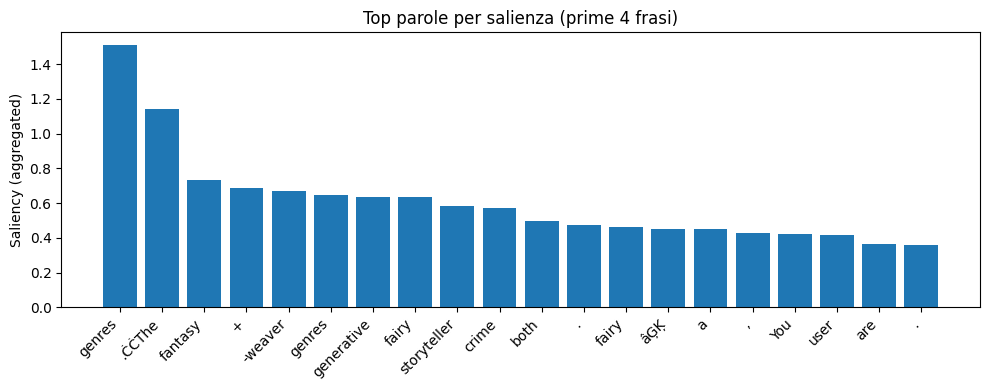

Esportato tutto in: gpt2_results


<Figure size 640x480 with 0 Axes>

In [13]:
for entry in system_prompts:
    technique = entry["Technique"]
    system_prompt = entry["System"]
    full_prompt = f"{system_prompt}\n\n{user_prompt}"

    print("\n\n\n",technique)

    model_name   = "gpt2"
    prompt       = full_prompt
    max_new_tok  = 250
    n_sentences  = 4
    temperature  = 0.7
    top_p        = 0.95
    top_k        = 50
    no_repeat_ngram_size = 3
    repetition_penalty = 1.2
    out_dir      = "gpt2_results"
    drop_punct_from_loss = True
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(f"{out_dir}/{technique}", exist_ok=True)

    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    prompt_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False).input_ids.to(device)
    prompt_len = prompt_ids.shape[1]

    full_ids, scores = generate_with_scores(
        model,
        prompt_ids,
        max_new_tokens=max_new_tok,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=no_repeat_ngram_size,
        repetition_penalty=repetition_penalty,
    )

    gen_ids        = full_ids[0, prompt_len:]
    generated_text = tokenizer.decode(gen_ids, skip_special_tokens=True)

    # Logprobs dataframe
    logprobs = compute_logprobs(scores, gen_ids)
    entropies, margins, top_ids, top_toks, top_lps = [], [], [], [], []

    for step_logits in scores:
        probs = torch.softmax(step_logits[0], dim=-1)
        logp  = torch.log(probs + 1e-12)
        entropies.append(-(probs * logp).sum().item())
        vals, idx = torch.topk(logp, top_k)
        probs_sorted = torch.softmax(step_logits[0], dim=-1).topk(2).values
        margins.append((probs_sorted[0] - probs_sorted[1]).item())
        top_ids.append(idx.cpu().tolist())
        top_toks.append(tokenizer.convert_ids_to_tokens(idx.cpu().tolist()))
        top_lps.append(vals.cpu().tolist())

    log_df = pd.DataFrame({
        "step": range(1, len(gen_ids)+1),
        "token_id": gen_ids.cpu().tolist(),
        "token_str": tokenizer.convert_ids_to_tokens(gen_ids.cpu().tolist()),
        "logprob": logprobs,
        "surprisal": [-lp for lp in logprobs],
        "entropy": entropies,
        "margin": margins,
        "top5_ids": top_ids,
        "top5_tokens": top_toks,
        "top5_logprobs": top_lps
    })
    display(log_df.head())

    focus_text = split_first_n_sentences(generated_text, n_sentences)
    focus_ids  = tokenizer(focus_text, return_tensors="pt", add_special_tokens=False).input_ids[0].to(device)
    focus_len  = focus_ids.shape[0]

    print(f"Initial {n_sentences} sentences ({focus_len} tokens):\n{focus_text}\n")

    sal_scores = compute_saliency_manual(
       model, full_ids, prompt_len, focus_len, device,
       drop_punct=drop_punct_from_loss, tokenizer=tokenizer
    )

    prompt_tokens = tokenizer.convert_ids_to_tokens(full_ids[0, :prompt_len].cpu().tolist())

    # Aggregation by word
    df_words = aggregate_bpe(prompt_tokens, sal_scores)

    # Show top score words
    display(df_words.sort_values("score", ascending=False).head(20))

    # Plot
    plot_word_saliency(df_words, top_n=20,
                   title=f"Top words by Saliency (first {n_sentences} sentences)")
    plt.savefig(f"{out_dir}/{technique}/saliency_words_{technique}.png", dpi=200)

    # Salvataggi
    pd.DataFrame({"token": prompt_tokens,
              "score": sal_scores.cpu().numpy()}).to_csv(f"{out_dir}/{technique}/saliency_tokens_{technique}.csv", index=False)
    df_words.to_csv(f"{out_dir}/{technique}/saliency_words_{technique}.csv", index=False)
    log_df.to_csv(f"{out_dir}/{technique}/logprobs_{technique}.csv", index=False)

    with open(f"{out_dir}/{technique}/meta_{technique}.json", "w", encoding="utf-8") as f:
        json.dump({
            "prompt": prompt,
            "full_generation": generated_text,
            "first_n_sentences": focus_text,
            "model": model_name,
            "n_sentences": n_sentences,
            "total_generated_tokens": int(len(gen_ids)),
            "focus_tokens": int(len(focus_ids))
        }, f, ensure_ascii=False, indent=2)

    print("Results correctly exported in dir:", out_dir)

### *LLaMa*

In [15]:
model_name   = "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model     = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
model.eval()

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1.
401 Client Error. (Request ID: Root=1-687fabc6-7a0b906720243c734225a0cb;935d7d24-d5d9-4dc8-a359-fd81afe5e2f5)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-Instruct-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-Instruct-v0.1 is restricted. You must have access to it and be authenticated to access it. Please log in.

In [ ]:
for entry in system_prompts:
    technique = entry["Technique"]
    system_prompt = entry["System"]
    full_prompt = f"{system_prompt}\n\n{user_prompt}"

    print("\n\n\n",technique)

    model_name   = "meta-llama/Llama-3.2-3B-Instruct"
    prompt       = full_prompt
    max_new_tok  = 250
    n_sentences  = 4
    temperature  = 0.7
    top_p        = 0.95
    top_k        = 50
    no_repeat_ngram_size = 3
    repetition_penalty = 1.2
    out_dir      = "llama_results"
    drop_punct_from_loss = True
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(f"{out_dir}/{technique}", exist_ok=True)

    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    prompt_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False).input_ids.to(device)
    prompt_len = prompt_ids.shape[1]

    full_ids, scores = generate_with_scores(
        model,
        prompt_ids,
        max_new_tokens=max_new_tok,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=no_repeat_ngram_size,
        repetition_penalty=repetition_penalty,
    )

    gen_ids        = full_ids[0, prompt_len:]
    generated_text = tokenizer.decode(gen_ids, skip_special_tokens=True)

    # Logprobs dataframe
    logprobs = compute_logprobs(scores, gen_ids)
    entropies, margins, top_ids, top_toks, top_lps = [], [], [], [], []

    for step_logits in scores:
        probs = torch.softmax(step_logits[0], dim=-1)
        logp  = torch.log(probs + 1e-12)
        entropies.append(-(probs * logp).sum().item())
        vals, idx = torch.topk(logp, top_k)
        probs_sorted = torch.softmax(step_logits[0], dim=-1).topk(2).values
        margins.append((probs_sorted[0] - probs_sorted[1]).item())
        top_ids.append(idx.cpu().tolist())
        top_toks.append(tokenizer.convert_ids_to_tokens(idx.cpu().tolist()))
        top_lps.append(vals.cpu().tolist())

    log_df = pd.DataFrame({
        "step": range(1, len(gen_ids)+1),
        "token_id": gen_ids.cpu().tolist(),
        "token_str": tokenizer.convert_ids_to_tokens(gen_ids.cpu().tolist()),
        "logprob": logprobs,
        "surprisal": [-lp for lp in logprobs],
        "entropy": entropies,
        "margin": margins,
        "top5_ids": top_ids,
        "top5_tokens": top_toks,
        "top5_logprobs": top_lps
    })
    display(log_df.head())

    focus_text = split_first_n_sentences(generated_text, n_sentences)
    focus_ids  = tokenizer(focus_text, return_tensors="pt", add_special_tokens=False).input_ids[0].to(device)
    focus_len  = focus_ids.shape[0]

    print(f"Initial {n_sentences} sentences ({focus_len} tokens):\n{focus_text}\n")

    sal_scores = compute_saliency_manual(
       model, full_ids, prompt_len, focus_len, device,
       drop_punct=drop_punct_from_loss, tokenizer=tokenizer
    )

    prompt_tokens = tokenizer.convert_ids_to_tokens(full_ids[0, :prompt_len].cpu().tolist())

    # Aggregation by word
    df_words = aggregate_bpe(prompt_tokens, sal_scores)

    # Show top score words
    display(df_words.sort_values("score", ascending=False).head(20))

    # Plot
    plot_word_saliency(df_words, top_n=20,
                   title=f"Top words by Saliency (first {n_sentences} sentences)")
    plt.savefig(f"{out_dir}/{technique}/saliency_words_{technique}.png", dpi=200)

    # Salvataggi
    pd.DataFrame({"token": prompt_tokens,
              "score": sal_scores.cpu().numpy()}).to_csv(f"{out_dir}/{technique}/saliency_tokens_{technique}.csv", index=False)
    df_words.to_csv(f"{out_dir}/{technique}/saliency_words_{technique}.csv", index=False)
    log_df.to_csv(f"{out_dir}/{technique}/logprobs_{technique}.csv", index=False)

    with open(f"{out_dir}/{technique}/meta_{technique}.json", "w", encoding="utf-8") as f:
        json.dump({
            "prompt": prompt,
            "full_generation": generated_text,
            "first_n_sentences": focus_text,
            "model": model_name,
            "n_sentences": n_sentences,
            "total_generated_tokens": int(len(gen_ids)),
            "focus_tokens": int(len(focus_ids))
        }, f, ensure_ascii=False, indent=2)

    print("Results correctly exported in dir:", out_dir)

### Mistral

In [16]:
model_name   = "mistralai/Mistral-7B-Instruct-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model     = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
model.eval()

tokenizer_config.json:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
for entry in system_prompts:
    technique = entry["Technique"]
    system_prompt = entry["System"]
    full_prompt = f"{system_prompt}\n\n{user_prompt}"

    print("\n\n\n",technique)

    model_name   = "mistralai/Mistral-7B-Instruct-v0.1"
    prompt       = full_prompt
    max_new_tok  = 250
    n_sentences  = 4
    temperature  = 0.7
    top_p        = 0.95
    top_k        = 50
    no_repeat_ngram_size = 3
    repetition_penalty = 1.2
    out_dir      = "mistral_results"
    drop_punct_from_loss = True
    os.makedirs(out_dir, exist_ok=True)
    os.makedirs(f"{out_dir}/{technique}", exist_ok=True)

    if tokenizer.pad_token_id is None:
        tokenizer.pad_token_id = tokenizer.eos_token_id

    prompt_ids = tokenizer(prompt, return_tensors="pt", add_special_tokens=False).input_ids.to(device)
    prompt_len = prompt_ids.shape[1]

    full_ids, scores = generate_with_scores(
        model,
        prompt_ids,
        max_new_tokens=max_new_tok,
        do_sample=True,
        temperature=temperature,
        top_p=top_p,
        top_k=top_k,
        pad_token_id=tokenizer.eos_token_id,
        no_repeat_ngram_size=no_repeat_ngram_size,
        repetition_penalty=repetition_penalty,
    )

    gen_ids        = full_ids[0, prompt_len:]
    generated_text = tokenizer.decode(gen_ids, skip_special_tokens=True)

    # Logprobs dataframe
    logprobs = compute_logprobs(scores, gen_ids)
    entropies, margins, top_ids, top_toks, top_lps = [], [], [], [], []

    for step_logits in scores:
        probs = torch.softmax(step_logits[0], dim=-1)
        logp  = torch.log(probs + 1e-12)
        entropies.append(-(probs * logp).sum().item())
        vals, idx = torch.topk(logp, top_k)
        probs_sorted = torch.softmax(step_logits[0], dim=-1).topk(2).values
        margins.append((probs_sorted[0] - probs_sorted[1]).item())
        top_ids.append(idx.cpu().tolist())
        top_toks.append(tokenizer.convert_ids_to_tokens(idx.cpu().tolist()))
        top_lps.append(vals.cpu().tolist())

    log_df = pd.DataFrame({
        "step": range(1, len(gen_ids)+1),
        "token_id": gen_ids.cpu().tolist(),
        "token_str": tokenizer.convert_ids_to_tokens(gen_ids.cpu().tolist()),
        "logprob": logprobs,
        "surprisal": [-lp for lp in logprobs],
        "entropy": entropies,
        "margin": margins,
        "top5_ids": top_ids,
        "top5_tokens": top_toks,
        "top5_logprobs": top_lps
    })
    display(log_df.head())

    focus_text = split_first_n_sentences(generated_text, n_sentences)
    focus_ids  = tokenizer(focus_text, return_tensors="pt", add_special_tokens=False).input_ids[0].to(device)
    focus_len  = focus_ids.shape[0]

    print(f"Initial {n_sentences} sentences ({focus_len} tokens):\n{focus_text}\n")

    sal_scores = compute_saliency_manual(
       model, full_ids, prompt_len, focus_len, device,
       drop_punct=drop_punct_from_loss, tokenizer=tokenizer
    )

    prompt_tokens = tokenizer.convert_ids_to_tokens(full_ids[0, :prompt_len].cpu().tolist())

    # Aggregation by word
    df_words = aggregate_bpe(prompt_tokens, sal_scores)

    # Show top score words
    display(df_words.sort_values("score", ascending=False).head(20))

    # Plot
    plot_word_saliency(df_words, top_n=20,
                   title=f"Top words by Saliency (first {n_sentences} sentences)")
    plt.savefig(f"{out_dir}/{technique}/saliency_words_{technique}.png", dpi=200)

    # Salvataggi
    pd.DataFrame({"token": prompt_tokens,
              "score": sal_scores.cpu().numpy()}).to_csv(f"{out_dir}/{technique}/saliency_tokens_{technique}.csv", index=False)
    df_words.to_csv(f"{out_dir}/{technique}/saliency_words_{technique}.csv", index=False)
    log_df.to_csv(f"{out_dir}/{technique}/logprobs_{technique}.csv", index=False)

    with open(f"{out_dir}/{technique}/meta_{technique}.json", "w", encoding="utf-8") as f:
        json.dump({
            "prompt": prompt,
            "full_generation": generated_text,
            "first_n_sentences": focus_text,
            "model": model_name,
            "n_sentences": n_sentences,
            "total_generated_tokens": int(len(gen_ids)),
            "focus_tokens": int(len(focus_ids))
        }, f, ensure_ascii=False, indent=2)

    print("Results correctly exported in dir:", out_dir)